In [55]:
import pandas as pd
from darts import TimeSeries

# Variables

	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

	+ weathersit : 

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [56]:
# Read a pandas DataFrame
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv('hour.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [57]:
# Create a TimeSeries, specifying the time and value columns
series_day_total = TimeSeries.from_dataframe(day_df, "instant", "cnt")
series_day_casual = TimeSeries.from_dataframe(day_df, "instant", "casual")
series_day_registered = TimeSeries.from_dataframe(day_df, "instant", "registered")
series_hour_total = TimeSeries.from_dataframe(hour_df, "instant", "cnt")
series_hour_casual = TimeSeries.from_dataframe(hour_df, "instant", "casual")
series_hour_registered = TimeSeries.from_dataframe(hour_df, "instant", "registered")
# Set aside the last 36 instances as a validation series
train, val = series_day_casual[:-90], series_day_casual[-90:]

/Users/kassandrabequer/Documents/CodingProjects/BikeShareDemandForecast/.venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


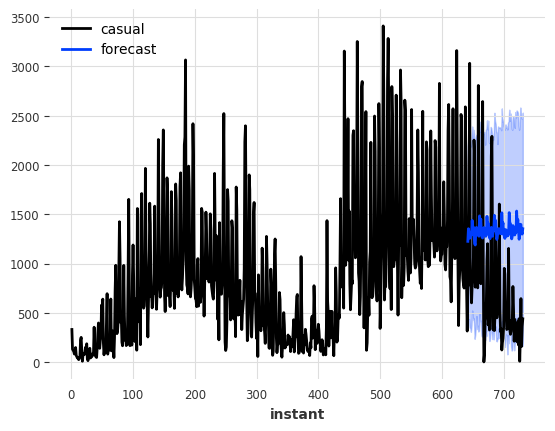

In [58]:
from darts.models import ExponentialSmoothing
import matplotlib.pyplot as plt

# Exponential Smoothing
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

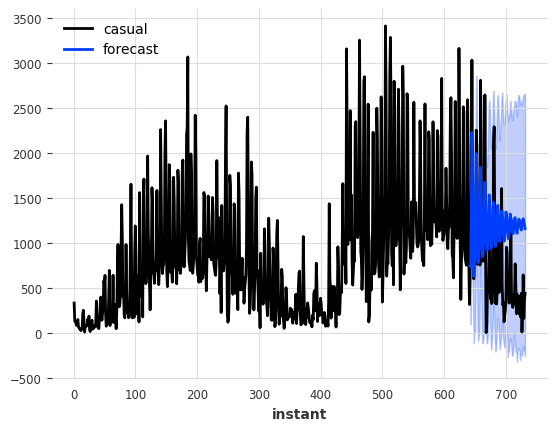

In [59]:
from darts.models import ARIMA

# ARIMA
model = ARIMA()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

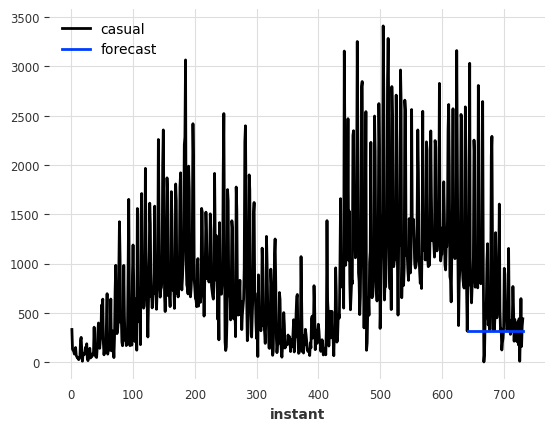

In [60]:
from darts.models import NaiveMovingAverage

# NaiveMovingAverage
model = NaiveMovingAverage()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

/Users/kassandrabequer/Documents/CodingProjects/BikeShareDemandForecast/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kassandrabequer/Documents/CodingProjects/BikeShareDemandForecast/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kassandrabequer/Documents/CodingProjects/BikeShareDemandForecast/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kassandrabequer/Documents/CodingProjects/BikeShareDemandForecast/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 a

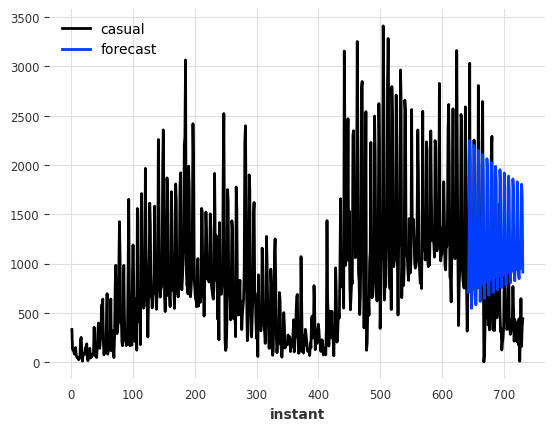

In [61]:
from darts.models import AutoARIMA

# AutoARIMA
model = AutoARIMA()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

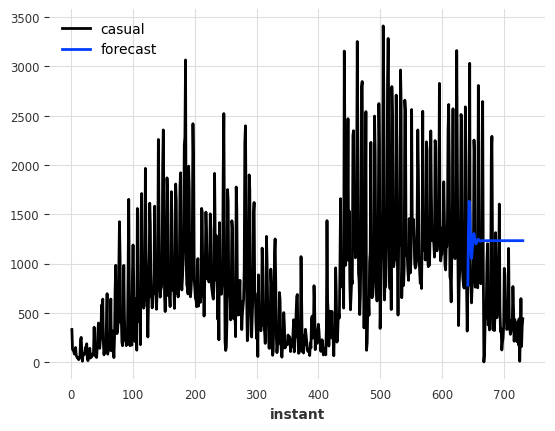

In [62]:
from darts.models import StatsForecastAutoARIMA

# StatsForecastAutoARIMA
model = StatsForecastAutoARIMA()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

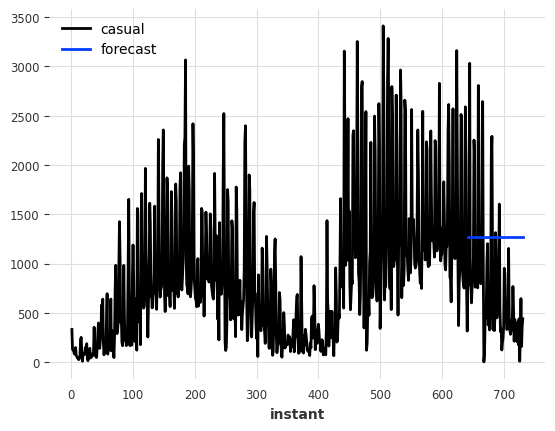

In [63]:
from darts.models import StatsForecastAutoETS

# StatsforecastAutoETS
model = StatsForecastAutoETS()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

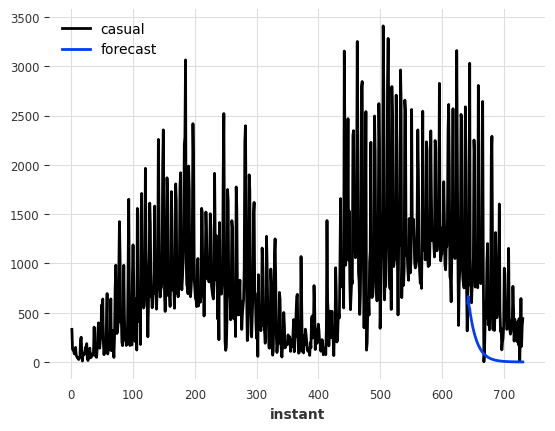

In [64]:
from darts.models import StatsForecastAutoCES

# StatsforecastAutoCES
model = StatsForecastAutoCES()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

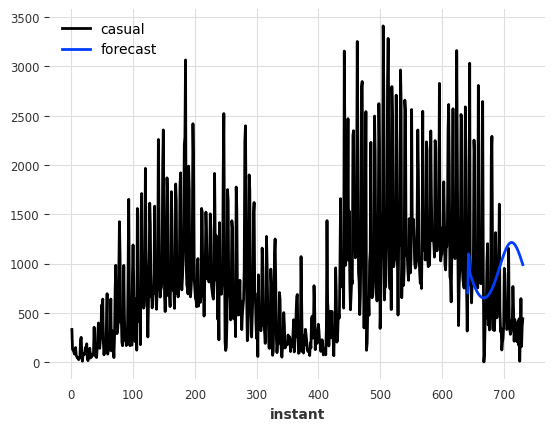

In [65]:
from darts.models import StatsForecastAutoTBATS

# StatsforecastAutoTBATS
model = StatsForecastAutoTBATS(season_length=90)
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

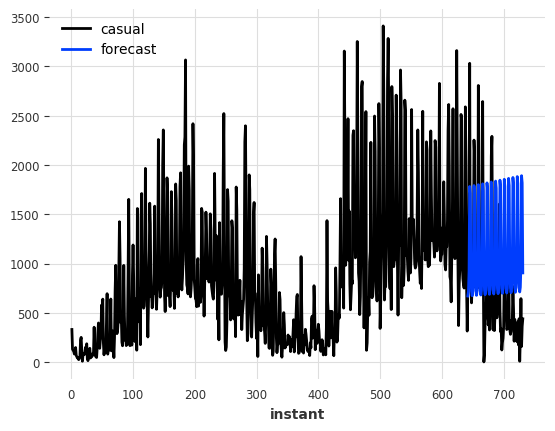

In [66]:
from darts.models import Theta

# Theta
model = Theta()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

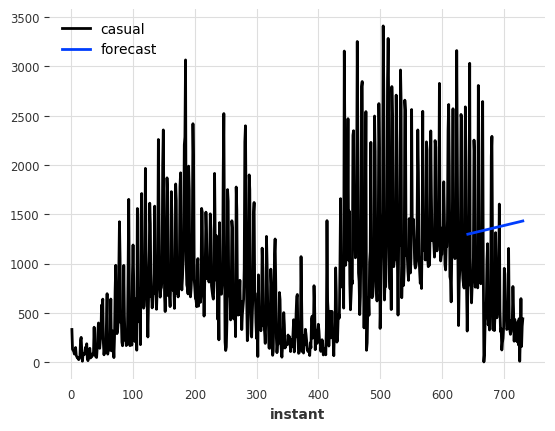

In [67]:
from darts.models import StatsForecastAutoTheta

# StatsForecastAutoTheta
model = StatsForecastAutoTheta()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

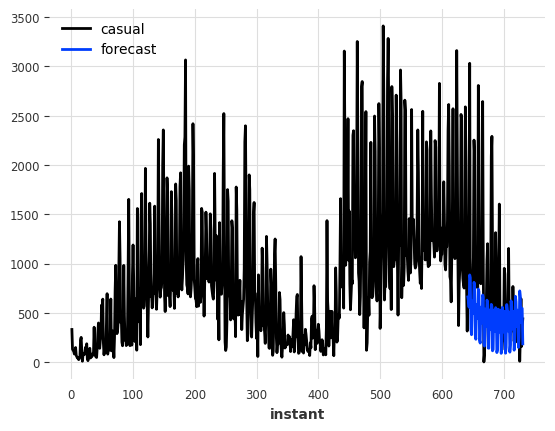

In [68]:
from darts.models import FFT

# FFT
model = FFT()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

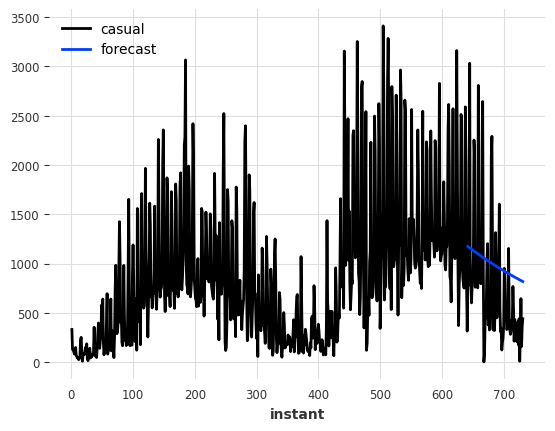

In [69]:
from darts.models import KalmanForecaster

# KalmanForecaster
model = KalmanForecaster()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

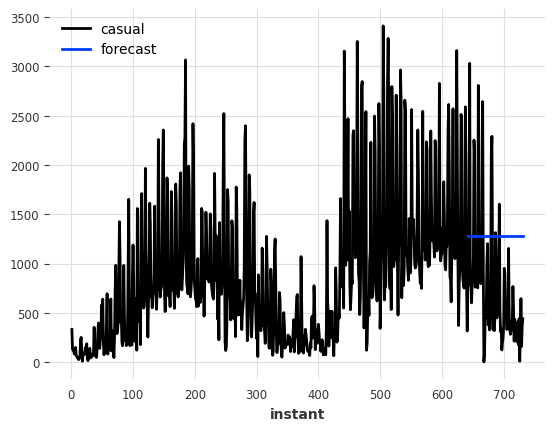

In [70]:
from darts.models import Croston

# Croston
model = Croston()
model.fit(train)
prediction = model.predict(len(val))
series_day_casual.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

# Multivariate Models

In [71]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [72]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [73]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [74]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

<Axes: xlabel='date'>

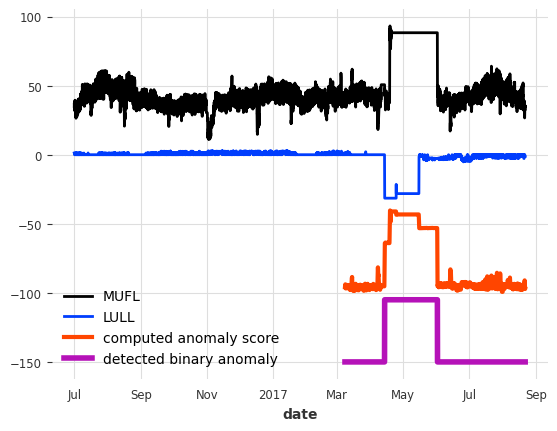

In [75]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [105]:
from darts import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Assuming 'df' is your DataFrame with a datetime index
target_series = TimeSeries.from_dataframe(day_df, time_col='instant', value_cols='casual')
covariates = TimeSeries.from_dataframe(day_df, time_col='instant', value_cols=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])

# Set forecast horizon
forecast_horizon = 7  # Example: Predict next 12 time steps

# Set lag parameter
lag = 7

# Create training set up to (final_data_point - forecast_horizon)
train_series = target_series[:-forecast_horizon]
train_covariates = covariates[:-forecast_horizon]

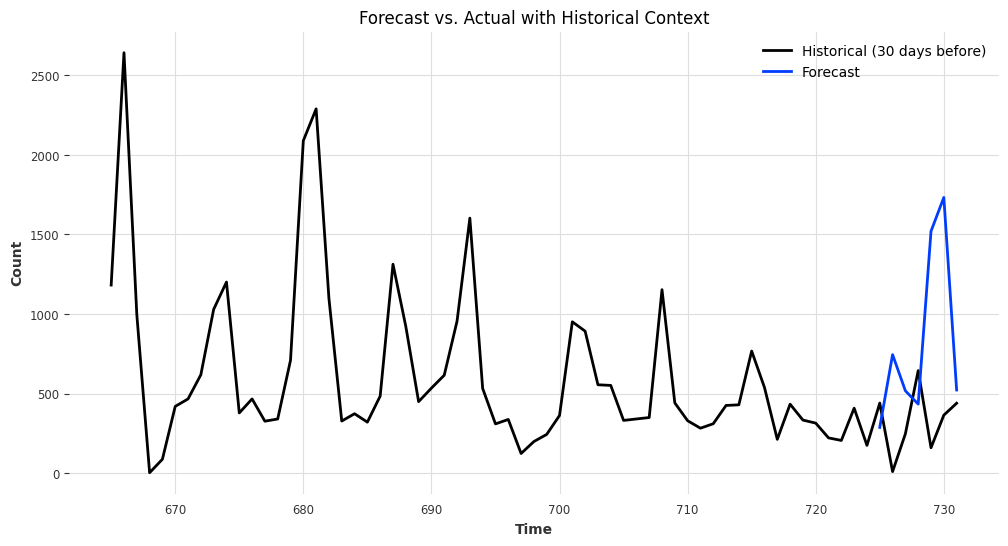

In [106]:
from darts.models import LinearRegressionModel
import matplotlib.pyplot as plt

# Fit the model
model = LinearRegressionModel(

    lags=lag,

    lags_past_covariates=lag,

    output_chunk_length=forecast_horizon,

)

model.fit(series=train_series, past_covariates=train_covariates)

# Make prediction
forecast = model.predict(n=forecast_horizon, past_covariates=train_covariates)

# Select 30 days before the forecast starts
historical_context = target_series[-(forecast_horizon + 60):]

# Plot everything
plt.figure(figsize=(12, 6))
historical_context.plot(label='Historical (30 days before)')
forecast.plot(label='Forecast', lw=2)

plt.title("Forecast vs. Actual with Historical Context")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


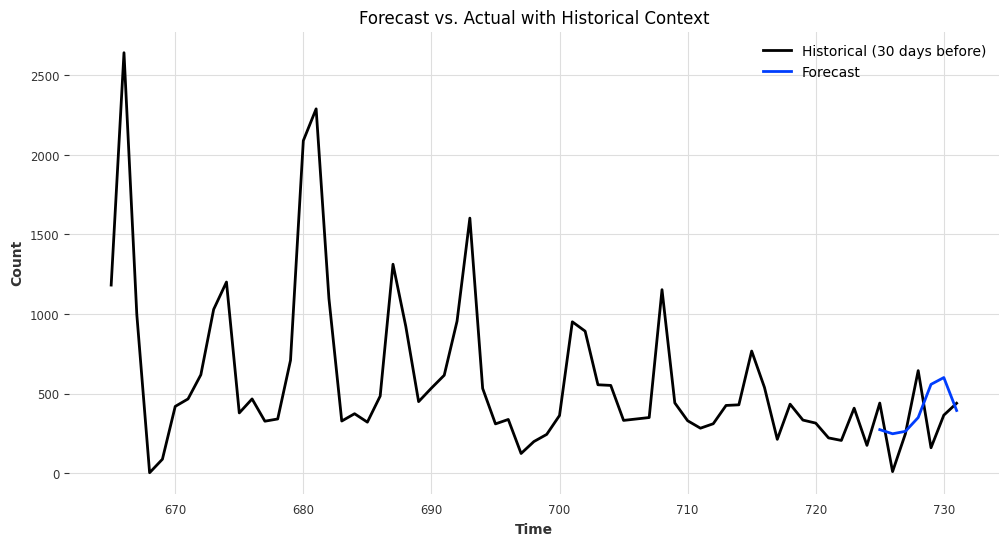

In [107]:
from darts.models import RandomForest
import matplotlib.pyplot as plt

# Fit the model
model = RandomForest(

    lags=lag,

    lags_past_covariates=lag,

    output_chunk_length=forecast_horizon,

)

model.fit(series=train_series, past_covariates=train_covariates)

# Make prediction
forecast = model.predict(n=forecast_horizon, past_covariates=train_covariates)

# Select 30 days before the forecast starts
historical_context = target_series[-(forecast_horizon + 60):]

# Plot everything
plt.figure(figsize=(12, 6))
historical_context.plot(label='Historical (30 days before)')
forecast.plot(label='Forecast', lw=2)

plt.title("Forecast vs. Actual with Historical Context")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


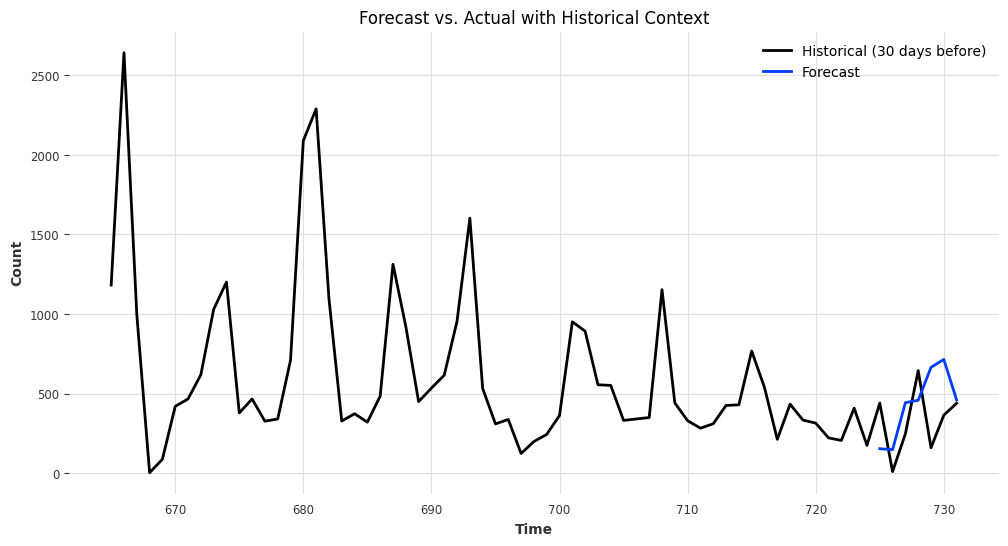

In [108]:
from darts.models import XGBModel
import matplotlib.pyplot as plt

# Fit the model
model = XGBModel(

    lags=lag,

    lags_past_covariates=lag,

    output_chunk_length=forecast_horizon,

)

model.fit(series=train_series, past_covariates=train_covariates)

# Make prediction
forecast = model.predict(n=forecast_horizon, past_covariates=train_covariates)

# Select 30 days before the forecast starts
historical_context = target_series[-(forecast_horizon + 60):]

# Plot everything
plt.figure(figsize=(12, 6))
historical_context.plot(label='Historical (30 days before)')
forecast.plot(label='Forecast', lw=2)

plt.title("Forecast vs. Actual with Historical Context")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


# Hourly Forecasting

In [115]:
# Assuming 'df' is your DataFrame with a datetime index
target_series = TimeSeries.from_dataframe(hour_df, time_col='instant', value_cols='casual')
covariates = TimeSeries.from_dataframe(hour_df, time_col='instant', value_cols=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])

# Set forecast horizon
forecast_horizon = 48  # Example: Predict next 12 time steps

# Set lag parameter
lag = 120

# Create training set up to (final_data_point - forecast_horizon)
train_series = target_series[:-forecast_horizon]
train_covariates = covariates[:-forecast_horizon]

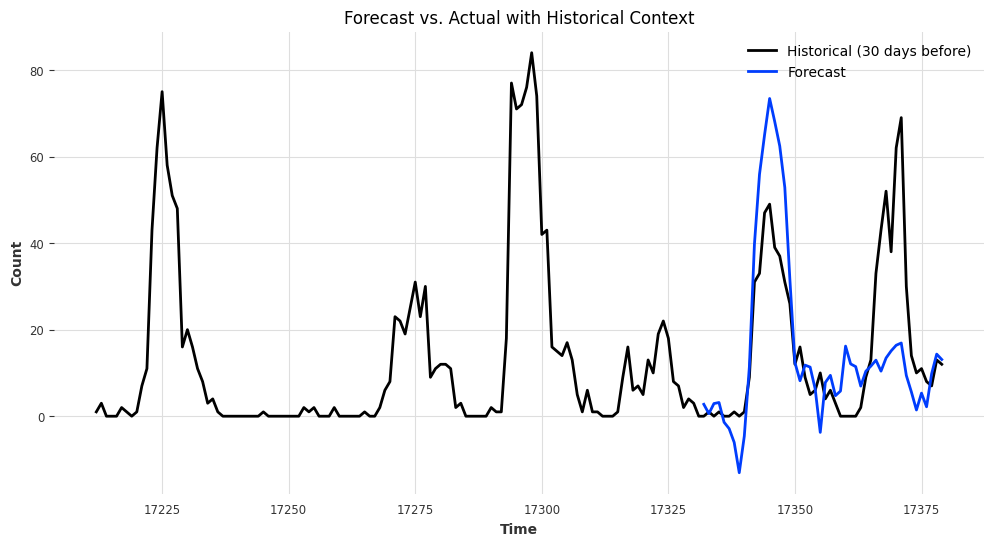

In [116]:
from darts.models import LinearRegressionModel
import matplotlib.pyplot as plt

# Fit the model
model = LinearRegressionModel(

    lags=lag,

    lags_past_covariates=lag,

    output_chunk_length=forecast_horizon,

)

model.fit(series=train_series, past_covariates=train_covariates)

# Make prediction
forecast = model.predict(n=forecast_horizon, past_covariates=train_covariates)

# Select 30 days before the forecast starts
historical_context = target_series[-(forecast_horizon + lag):]

# Plot everything
plt.figure(figsize=(12, 6))
historical_context.plot(label='Historical (30 days before)')
forecast.plot(label='Forecast', lw=2)

plt.title("Forecast vs. Actual with Historical Context")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


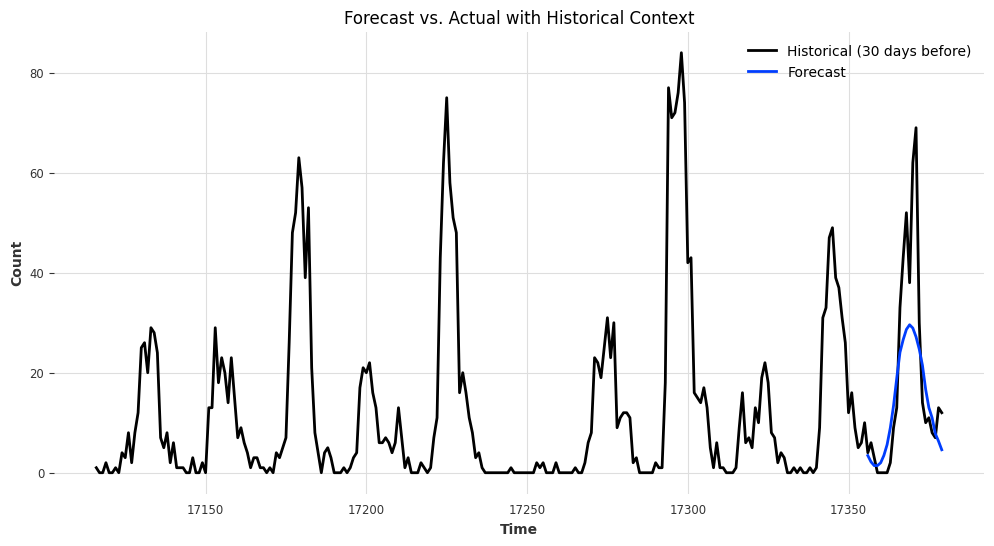

In [113]:
from darts.models import RandomForest
import matplotlib.pyplot as plt

# Fit the model
model = RandomForest(

    lags=lag,

    lags_past_covariates=lag,

    output_chunk_length=forecast_horizon,

)

model.fit(series=train_series, past_covariates=train_covariates)

# Make prediction
forecast = model.predict(n=forecast_horizon, past_covariates=train_covariates)

# Select 30 days before the forecast starts
historical_context = target_series[-(forecast_horizon + lag):]

# Plot everything
plt.figure(figsize=(12, 6))
historical_context.plot(label='Historical (30 days before)')
forecast.plot(label='Forecast', lw=2)

plt.title("Forecast vs. Actual with Historical Context")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


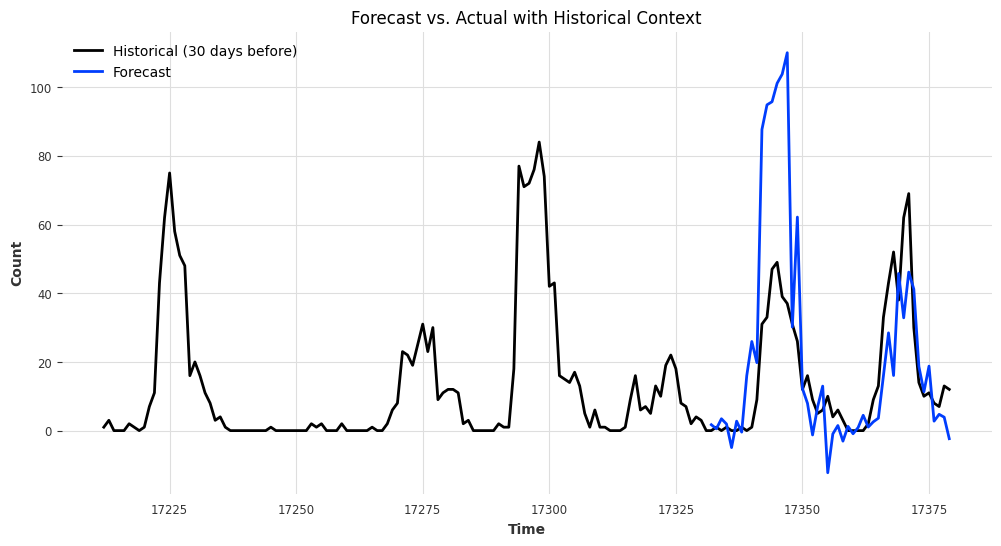

In [117]:
from darts.models import XGBModel
import matplotlib.pyplot as plt

# Fit the model
model = XGBModel(

    lags=lag,

    lags_past_covariates=lag,

    output_chunk_length=forecast_horizon,

)

model.fit(series=train_series, past_covariates=train_covariates)

# Make prediction
forecast = model.predict(n=forecast_horizon, past_covariates=train_covariates)

# Select 30 days before the forecast starts
historical_context = target_series[-(forecast_horizon + lag):]

# Plot everything
plt.figure(figsize=(12, 6))
historical_context.plot(label='Historical (30 days before)')
forecast.plot(label='Forecast', lw=2)

plt.title("Forecast vs. Actual with Historical Context")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()
